# EDA : Emotions Dataset

## Libraries 

In [1]:
import numpy  as np
import pandas as pd
import json

import datetime
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

from sklearn import cluster

import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

import folium
from branca.element import Figure
from sklearn.cluster import KMeans

In [2]:
emo_df = pd.read_csv('../raw_data/emotion_data.csv')

## Entire training set size

In [3]:
emo_df.shape

(61271, 2)

## Classes balance

In [4]:
emo_df['Emotion'].value_counts()

anger      15872
joy        14168
worry      11786
neutral    10212
sad         9233
Name: Emotion, dtype: int64

## Clean_data

In [49]:
def clean_data(data):
    """
    clean and preprocess data
    """
    # Lowercase text
    data['clean_text'] = data['Text'].apply(
        lambda x: x.lower()
        )
    # Strip whitespace
    data['clean_text'] = data['clean_text'].apply(
        lambda x: x.strip()
        )
    # Remove numbers
    data['clean_text'] = data['clean_text'].apply(
        lambda x: ''.join(let for let in x if not let.isdigit())
        )
    # Remove punctuation
    data['clean_text'] = data['clean_text'].apply(
        lambda x: ''.join(let for let in x if not let in string.punctuation)
        )
    # Tokenization with nltk
    data['clean_text'] = data['clean_text'].apply(
        lambda x: word_tokenize(x)
    )

    #Remove stopwords
    #stop_words = set(stopwords.words('english'))
    #data['clean_text'] = data['clean_text'].apply(
    #    lambda x: [word for word in x if word not in stop_words]
    #)
    
    # Lemmatizing with nltk
    lemmatizer = WordNetLemmatizer()
    data['clean_text'] = data['clean_text'].apply(
        lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x)
        )

    # Return data
    return data

In [15]:
clean_data(emo_df)

,Emotion,Text,clean_text
0,sad,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhhwaitin call
1,sad,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
2,joy,wants to hang out with friends SOON!,want hang friend soon
3,worry,Re-pinging @ghostridah14: why didn't you go to...,repinging ghostridah didnt go prom bc bf didnt...
4,sad,"I should be sleep, but im not! thinking about ...",sleep im thinking old friend want he married d...
5,worry,Hmmm. http://www.djhero.com/ is down,hmmm httpwwwdjherocom
6,sad,@charviray Charlene my love. I miss you,charviray charlene love miss
7,sad,@kelcouch I'm sorry at least it's Friday?,kelcouch im sorry least friday
8,worry,Choked on her retainers,choked retainer
9,sad,Ugh! I have to beat this stupid song to get to...,ugh beat stupid song get next rude


In [50]:
emotion_stopwords = clean_data(emo_df)

# Clean data without stopwords (TFID & LDA)

## Total of words without stopwords

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_wthout_stopwords = TfidfVectorizer()

X_without_stopwords = tfidf_wthout_stopwords.fit_transform(emo_df.clean_text)

X_without_stopwords.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
pd.DataFrame(X_without_stopwords.toarray(),columns = tfidf_wthout_stopwords.get_feature_names())

,aa,aaa,aaaa,aaaaaaaa,aaaaaaaaaaa,aaaaaaaaaahhhhhhhh,aaaaaaaaaamazing,aaaaaaaafternoon,aaaaaaaahhhhhhhh,aaaaaah,...,½ureo,½ve,½we,½who,½why,½whyyy,½y,½you,½z,½ï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
number_words_without_stopwords= 51512

## Plot 20 most common words

In [22]:

def plot_20_most_common_words(count_data):
    import matplotlib.pyplot as plt
    words = tfidf_wthout_stopwords.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

/Users/audehamdi/.pyenv/versions/3.7.7/envs/le-wagon-7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


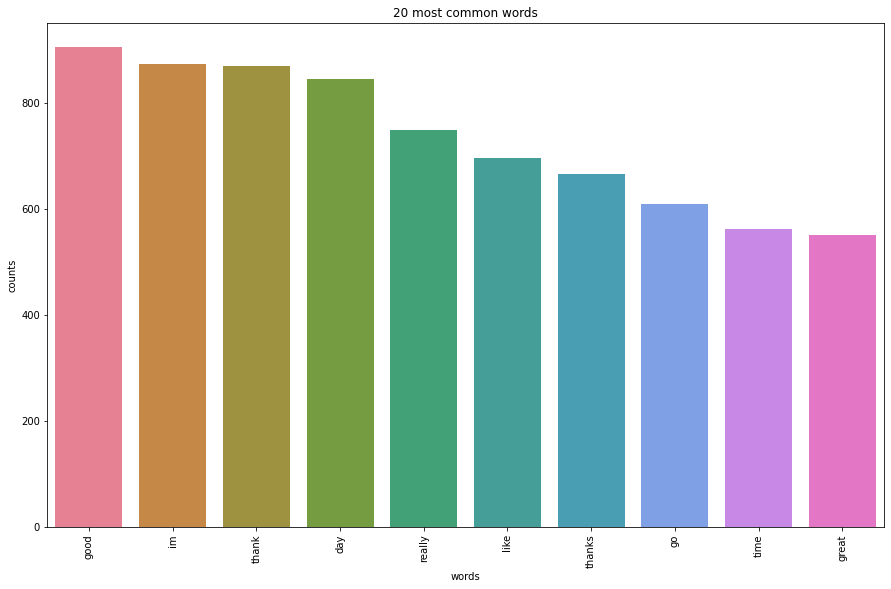

In [23]:
plot_20_most_common_words(X_without_stopwords)

## 20 most seen words without stopwords

In [20]:
tfidf_maxwords = TfidfVectorizer(max_features = 20)

X_max = tfidf_maxwords.fit_transform(emo_df.clean_text)

X_max.toarray()

pd.DataFrame(X_max.toarray(),columns = tfidf_maxwords.get_feature_names())

,day,dont,friend,get,go,going,good,got,im,know,like,love,one,really,see,thank,thanks,time,well,work
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.617583,0.000000,0.566916,0.000000,0.0,0.0,0.000000,0.000000,0.545158,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.779550,0.000000,0.000000,0.000000,0.0,0.0,0.626341,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [21]:
max_words_remove_stopwords = tfidf_maxwords.get_feature_names()

## LDA train/test split without stopwords

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(emo_df['clean_text'], emo_df['Emotion'], test_size=0.3, random_state=0)

### Scaling data --> stopwords are removed

In [28]:
X_train_without_stopwords = tfidf_wthout_stopwords.fit_transform(X_train)

In [32]:
X_train_encoded = X_train_without_stopwords.toarray()

In [39]:
X_test_ = tfidf_wthout_stopwords.transform(X_test)

In [40]:
X_test_encoded = X_test_.toarray()

In [54]:
encoding = {
    'joy': 0,
    'worry': 1,
    'anger': 2,
    'sad': 3,
    'neutral': 4
}

# Integer labels
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [55]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### LDA model

In [56]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

vectorizer = TfidfVectorizer().fit(X_train)

data_vectorized = vectorizer.transform(X_train)

lda_model = LDA(n_components=5).fit(data_vectorized, y_train)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('thanks', 160.57038682030665), ('welcome', 78.7827308005525), ('youre', 57.93728334296492), ('lot', 43.155400669788825), ('for', 28.653506568397383), ('the', 22.39362344911005), ('of', 20.342524829074407), ('it', 17.973913791360566), ('is', 17.956287278242876), ('to', 17.735984977718324)]
Topic 1:
[('congratulation', 55.99825807870191), ('certainly', 18.373319337339854), ('haha', 17.902683531311084), ('lol', 15.575975146914857), ('thanks', 14.94286441444883), ('fabulous', 13.049190621050034), ('thatll', 10.93925620051827), ('link', 10.618163576414453), ('on', 9.126615293088419), ('the', 8.411667976787948)]
Topic 2:
[('it', 103.67879221906834), ('to', 98.59573628334094), ('my', 86.06661199033253), ('the', 83.79544304063751), ('is', 71.05139814887028), ('pleasure', 59.78851898619685), ('just', 55.855921288012176), ('on', 55.47971893379142), ('you', 55.086058485556684), ('me', 51.613680718636445)]
Topic 3:
[('you', 1091.7313321619351), ('thank', 521.1344774488225), ('it', 507.5

# Clean data & TFID with stopwords

## Vectorize + 51 626 independent words

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()

X = tf_idf_vectorizer.fit_transform(emo_df.clean_text)

X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

,aa,aaa,aaaa,aaaaaaaa,aaaaaaaaaaa,aaaaaaaaaahhhhhhhh,aaaaaaaaaamazing,aaaaaaaafternoon,aaaaaaaahhhhhhhh,aaaaaah,...,½ureo,½ve,½we,½who,½why,½whyyy,½y,½you,½z,½ï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Vectorize with max features to see which words are the most used 

In [9]:
tf_idf_vectorizer2 = TfidfVectorizer(max_features = 20)

X2 = tf_idf_vectorizer2.fit_transform(emo_df.clean_text)

X2.toarray()

pd.DataFrame(X2.toarray(),columns = tf_idf_vectorizer2.get_feature_names())

,and,at,for,have,im,in,is,it,me,my,not,of,on,so,that,the,to,wa,with,you
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.697495,0.000000,0.000000,0.000000,0.000000,0.000000,0.716589,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.535400,0.000000,0.844599,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.844923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.347794,0.000000,0.000000,0.406380
4,0.000000,0.000000,0.000000,0.000000,0.595366,0.000000,0.000000,0.000000,0.534605,0.000000,0.599780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.720691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693257
7,0.000000,0.624166,0.000000,0.000000,0.628975,0.000000,0.000000,0.463473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.437930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.286128,0.852261,0.000000,0.000000,0.000000


In [10]:
most_famous_words = tf_idf_vectorizer2.get_feature_names()

## LDA Model with stopwords

In [52]:
X_train, X_test, y_train, y_test = train_test_split(emotion_stopwords['clean_text'], emotion_stopwords['Emotion'], test_size=0.3, random_state=0)

In [57]:
vec_stopwords = TfidfVectorizer().fit(X_train)

data_with_stopwords_vectorized = vec_stopwords.transform(X_train)

lda_model2 = LDA(n_components=5).fit(data_with_stopwords_vectorized, y_train)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model2, vec_stopwords)

Topic 0:
[('to', 1291.894281076163), ('the', 1232.2750783297934), ('it', 939.2703565982597), ('my', 890.4385053192198), ('and', 831.3408298704626), ('you', 830.667669683329), ('of', 689.2715874142729), ('in', 651.9179879493302), ('that', 631.2256075049613), ('wa', 594.1142536740506)]
Topic 1:
[('pleasure', 65.76388595569856), ('is', 65.08173723910005), ('it', 57.76190473262138), ('my', 56.483384447194396), ('the', 51.28216383242974), ('congratulation', 46.85374612514759), ('you', 46.24242724353159), ('in', 46.04699676143629), ('your', 42.62203586521213), ('to', 36.517180364673514)]
Topic 2:
[('you', 544.3546056957564), ('thank', 518.2837663805766), ('thanks', 322.05306405371175), ('day', 204.15804633133382), ('happy', 202.4671142840639), ('mother', 197.73119452405183), ('good', 190.17737203387568), ('very', 168.37812901555105), ('much', 161.76404801934126), ('for', 159.01226484235724)]
Topic 3:
[('welcome', 125.17439722119569), ('you', 116.32981564210705), ('youre', 62.623844765826846)

# wordcloud based on sentiment 

In [ ]:



# then do cloudwords
